In [1]:
#INTRODUCTION---->Commerce Sales Data Analysis-->This project analyzes sales data to uncover trends,best-selling products,and revenue patterns 
#using pandas & matlptolib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
d=pd.read_csv(r"C:\Users\Pooja Taneja\Downloads\ecommerce_sales_data.csv")
d

,Order ID,Order Date,Customer Name,Region,Category,Product,Quantity,Price
0,1001,2023-01-05,Alice,North,Electronics,Laptop,1,800
1,1002,2023-01-12,Bob,East,Clothing,Shirt,2,40
2,1003,2023-02-14,Charlie,West,Electronics,Headphones,1,100
3,1004,2023-02-20,David,South,Furniture,Chair,1,150
4,1005,2023-03-05,Eve,North,Clothing,Jeans,3,60
5,1006,2023-03-18,Frank,East,Furniture,Table,1,300
6,1007,2023-04-02,Grace,West,Electronics,Mouse,2,25
7,1008,2023-04-15,Hannah,South,Clothing,T-Shirt,2,30
8,1009,2023-05-10,Ian,North,Furniture,Sofa,1,500
9,1010,2023-05-22,Jack,East,Electronics,Keyboard,1,45


In [18]:
#DATA OVERVIEW:
#1.Show first 5 rows of dataset
d.head(5)

,Order ID,Order Date,Customer Name,Region,Category,Product,Quantity,Price
0,1001,2023-01-05,Alice,North,Electronics,Laptop,1,800
1,1002,2023-01-12,Bob,East,Clothing,Shirt,2,40
2,1003,2023-02-14,Charlie,West,Electronics,Headphones,1,100
3,1004,2023-02-20,David,South,Furniture,Chair,1,150
4,1005,2023-03-05,Eve,North,Clothing,Jeans,3,60


In [20]:
#2.CHeck shape of data
#Insights--->There is 10 rows and 8 columns
d.shape #2.There is 10 rows and 8 columns

(10, 8)

In [22]:
#3.Check missing values
#Insights--->It gives no column has missing values.
d.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Region           0
Category         0
Product          0
Quantity         0
Price            0
dtype: int64

In [23]:
#4.check data type of all columns
#Insights--->gives dataype in int64,datetime,object. 
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       10 non-null     int64         
 1   Order Date     10 non-null     datetime64[ns]
 2   Customer Name  10 non-null     object        
 3   Region         10 non-null     object        
 4   Category       10 non-null     object        
 5   Product        10 non-null     object        
 6   Quantity       10 non-null     int64         
 7   Price          10 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 772.0+ bytes


In [28]:
#DATA CLEANING
#1.Convert Order Date to datetime format
#Insights---> As an object you cannot do extract month year but as a datetime you can do extract month,year)
d["Order Date"]=pd.to_datetime(d["Order Date"])

In [29]:
#2.new column
#Insights--->make new column by the name of Total Sales.
d["Total Sales"]=d["Quantity"]*d["Price"]
d

,Order ID,Order Date,Customer Name,Region,Category,Product,Quantity,Price,Total Sales
0,1001,2023-01-05,Alice,North,Electronics,Laptop,1,800,800
1,1002,2023-01-12,Bob,East,Clothing,Shirt,2,40,80
2,1003,2023-02-14,Charlie,West,Electronics,Headphones,1,100,100
3,1004,2023-02-20,David,South,Furniture,Chair,1,150,150
4,1005,2023-03-05,Eve,North,Clothing,Jeans,3,60,180
5,1006,2023-03-18,Frank,East,Furniture,Table,1,300,300
6,1007,2023-04-02,Grace,West,Electronics,Mouse,2,25,50
7,1008,2023-04-15,Hannah,South,Clothing,T-Shirt,2,30,60
8,1009,2023-05-10,Ian,North,Furniture,Sofa,1,500,500
9,1010,2023-05-22,Jack,East,Electronics,Keyboard,1,45,45


In [34]:
#3.Check for duplicates 
#Insights--->It gives nothing it means no duplicates present in it. 
d.drop_duplicates(inplace=True)

In [39]:
#BASIC ANALYSIS
#1.total revenue-->gives sum of total sales
#Insights--->2265 adds all total sales of products and gives total revenue
total_revenue=d["Total Sales"].sum()
print("Total revenue : ",total_revenue)

Total revenue :  2265


In [52]:
#2.How many orders
#Insights--->10 is total no of orders which placed by customer.
print(" Total No of orders :",d["Order ID"].count())

 Total No of orders : 10


In [45]:
#3.Average order value
#Insights---->It gives 226.5 of total sales.
print("Average order value:",d["Total Sales"].mean())

Average order value: 226.5


In [51]:
#Product and Category Analysis
#1.which product has highest sales(revenue)?
#Insights--->.Laptop product has maximum sales
d.groupby("Product")["Total Sales"].sum().idxmax()


'Laptop'

In [55]:
#2.Which category generated higher quantity 
#Insights--->"Jeans" product has higher quantity than other product.
d.groupby("Product")["Quantity"].sum().idxmax() #idxmax-->returns Product name which has max quantity.

'Jeans'

In [58]:
#Region analysis
#which region has highest sales
#Insights--->North region has highest sales among all other regions
d.groupby("Region")["Total Sales"].sum().idxmax()

'North'

In [61]:
#max order count by region
#Insights--->East  and North region placed 3 orders and other south and west placed 2 orders.
d.groupby("Region")["Order ID"].count().sort_values(ascending=False)

Region
East     3
North    3
South    2
West     2
Name: Order ID, dtype: int64

In [76]:
#Time Based Analysis
#1.Sales by month
#Insights---> extract from order date column to month
d["Order_month"]=d["Order Date"].dt.month
d

,Order ID,Order Date,Customer Name,Region,Category,Product,Quantity,Price,Total Sales,Order_month
0,1001,2023-01-05,Alice,North,Electronics,Laptop,1,800,800,1
1,1002,2023-01-12,Bob,East,Clothing,Shirt,2,40,80,1
2,1003,2023-02-14,Charlie,West,Electronics,Headphones,1,100,100,2
3,1004,2023-02-20,David,South,Furniture,Chair,1,150,150,2
4,1005,2023-03-05,Eve,North,Clothing,Jeans,3,60,180,3
5,1006,2023-03-18,Frank,East,Furniture,Table,1,300,300,3
6,1007,2023-04-02,Grace,West,Electronics,Mouse,2,25,50,4
7,1008,2023-04-15,Hannah,South,Clothing,T-Shirt,2,30,60,4
8,1009,2023-05-10,Ian,North,Furniture,Sofa,1,500,500,5
9,1010,2023-05-22,Jack,East,Electronics,Keyboard,1,45,45,5


In [77]:
#month wise sales
#Insights--->It gives January placed highest (880) sales,Februray placed 250 sales , March placed 480 sales , April placed 110 sales, May placed 545 sales
d.groupby("Order_month")["Total Sales"].sum()

Order_month
1    880
2    250
3    480
4    110
5    545
Name: Total Sales, dtype: int64

In [78]:
#maximum sales in which month
#Insights--->Januray placed maximum sales among all months
d.groupby("Order_month")["Total Sales"].sum().idxmax()

1

In [133]:
#Top 3 Customer name which has max sales
#Inisghts-->Alice is to customer with 800 in sales , followed by Ian(500) and Frank(300).
d.groupby("Customer Name")["Total Sales"].sum().sort_values(ascending=False).head(3)


Customer Name
Alice    800
Ian      500
Frank    300
Name: Total Sales, dtype: int64

In [104]:
#2.Customer with most orders
#Insights-->Alice placed highest number of orders among all customers.
d.groupby("Customer Name")["Order ID"].count().idxmax()

'Alice'

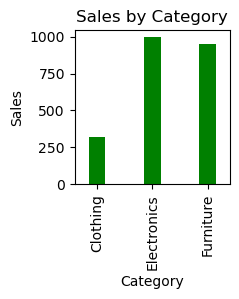

In [110]:
#Visualizations
#Bar chart-->it shows sales by category
#Insights-->It shows sales of electronic is high.
sales_category=d.groupby("Category")["Total Sales"].sum()
plt.figure(figsize=(2,2))
sales_category.plot(kind="bar",color="green",width=0.3)
plt.ylabel("Sales")
plt.title("Sales by Category")
plt.show()

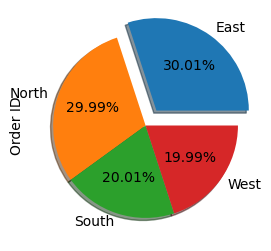

In [132]:
#Pie Chart-->It showing region by order id
#Insights-->It shows max order in east region.
orders_region=d.groupby("Region")["Order ID"].sum()
e=(0.2,0,0,0) #It shows max order in which region
plt.figure(figsize=(3,3))
orders_region.plot(kind="pie",shadow=True,autopct="%1.2f%%",explode=e)
plt
plt.show()

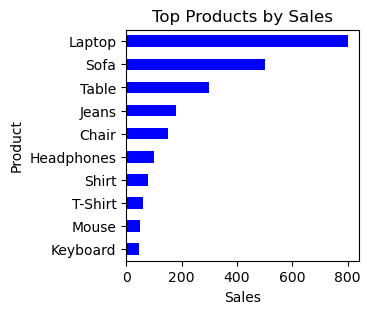

In [124]:
#Top products by sales
#Horizonatal bar chart -->which shows top product by sales. 
#Insights-->It shows sales of laptop is high.
sales_products=d.groupby("Product")["Total Sales"].sum().sort_values(ascending=True)
plt.figure(figsize=(3,3))
sales_products.plot(kind="barh",color="blue")
plt.xlabel("Sales")
plt.title("Top Products by Sales")
plt.show()

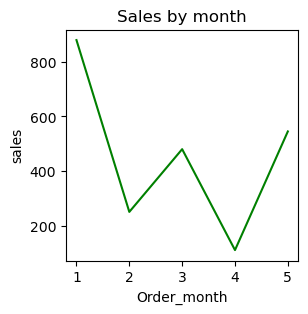

In [127]:
#line chart---->It shows sales by month
#Insights--->It shows in 1st month has max sales.
month_sales=d.groupby("Order_month")["Total Sales"].sum()
plt.figure(figsize=(3,3))
month_sales.plot(kind="line",color="green")
plt.ylabel("sales")
plt.title("Sales by month")

plt.show()

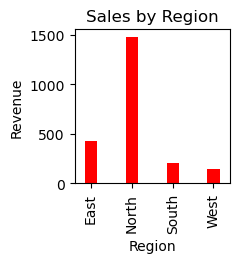

In [128]:
#Bar Chart---->It shows sales by region.
#Insights-->It shows north region has max sales.
region_sales=d.groupby("Region")["Total Sales"].sum()
plt.figure(figsize=(2,2))
region_revenue.plot(kind="bar",color="red",width=0.3)

plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()